In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler

data = pd.read_csv("hotel_booking.csv")


data_deleted= data.drop(data.columns[[3,4,5,6,10,13,23,24,25,28,29,30,31,32,33,34,35]] , axis = 1)

for name in ["hotel","meal","market_segment","distribution_channel","reserved_room_type","assigned_room_type","deposit_type","customer_type"]:
    enc_arr = OneHotEncoder().fit_transform(data[[name]]).toarray()
    data_deleted["encoded_"+name] = enc_arr.tolist()
    #print(data_deleted)
    data_deleted.drop(name,axis=1, inplace=True)

for name in ["lead_time","stays_in_weekend_nights","stays_in_week_nights","adults","babies","is_repeated_guest","previous_cancellations","previous_bookings_not_canceled","booking_changes","adr"]:
    arr = data_deleted[name].to_numpy()
    normalized_arr = preprocessing.normalize([arr])
    normalized_arr_transpose = np.transpose(normalized_arr)
    data_deleted["normalized_"+name] = normalized_arr_transpose.tolist()
    data_deleted.drop(name, axis=1, inplace=True)

X=data_deleted.drop("is_canceled",axis=1)
y = data_deleted["is_canceled"]

rus = RandomUnderSampler(sampling_strategy='not minority')
X_res, y_res = rus.fit_resample(X,y)

final_data = X_res.join(y_res)

final_data.to_csv("final_data.csv", index = False,header=None)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
data = pd.read_csv("final_data.csv")

from sklearn import svm
np.random.seed(7)
data= data.to_numpy()

x_=data[:,0:-1]
y=data[:,-1]
a=True
b=True
c=3
d=[]
for i in x_:
  #print(i)
  x=[]
  for j in i:
    #print(j)
    #print(len(j))
    if j.__contains__(','):
      for e in range(len(j)):
        #print(len(j))
        if e%5==0:
          #print(e%5)
          #print(e)
          if e<len(j)-2:
            #print(len(j)-2)
            #print((j[e+1:e+1+c]))
            x.append(float(j[e+1:e+1+c]))
            #print(x)
    else:
      x.append(j[1:len(j)-1])
  #print(type(x[0]))
  d.append(x)
  #print(type(d[0][0]))

x_data=np.array(d)
x_data=x_data.astype(np.float64)

from sklearn.decomposition import PCA
pca = PCA(n_components=10)
x_data=pca.fit_transform(x_data)

x_arr=  np.empty(x_data.shape, dtype=x_data.dtype)
y_list = []
p = np.random.permutation(len(x_data))
for m, n in enumerate(p):
  x_arr[n] = x_data[m]
  if y[m]==0:
    a=np.array([0])
    y_list.append(a)
  else:
    a=np.array([1])
    y_list.append(a)
  """
  y_arr[n] = y[m]
  """
y_arr=np.array(y_list)
x_train=x_arr[0:(len(x_arr)//10)*7]
y_train=y_arr[0:(len(y_arr)//10)*7]
x_val=x_arr[(len(x_arr)//10)*7:(len(x_arr)//10)*8]
y_val=y_arr[(len(y_arr)//10)*7:(len(x_arr)//10)*8]
x_test=x_arr[(len(x_arr)//10)*8:len(x_arr)]
y_test=y_arr[(len(y_arr)//10)*8:len(y_arr)]
print(np.shape(x_test))
print(np.shape(y_test))

def acc(x_test,y_test,clf):
  a=0
  for i in range(len(x_test)):
    res=clf.predict(x_test[i].reshape(1,-1))
    #print(res)
    if res==y_test[i]:
      a+=1
  return a/len(x_test)

y_train=y_train.astype(np.uint8)


(17695, 10)
(17695, 1)


In [ ]:
import tensorflow as tf
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
model = Sequential()
model.add(Dense(32, input_shape=(10,), activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))

In [ ]:
type(y_train[0])

numpy.ndarray

In [ ]:
model.compile(optimizer='sgd',loss='mse',metrics=[tf.keras.metrics.BinaryAccuracy()])
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
1935/1935 [==============================] - 3s 2ms/step - loss: 0.2124 - binary_accuracy: 0.6381 - val_loss: 0.4912 - val_binary_accuracy: 0.6441
Epoch 2/5
1935/1935 [==============================] - 3s 2ms/step - loss: 0.2041 - binary_accuracy: 0.6342 - val_loss: 0.5107 - val_binary_accuracy: 0.6340
Epoch 3/5
1935/1935 [==============================] - 3s 2ms/step - loss: 0.2041 - binary_accuracy: 0.6312 - val_loss: 0.5102 - val_binary_accuracy: 0.6309
Epoch 4/5
1935/1935 [==============================] - 3s 2ms/step - loss: 0.2041 - binary_accuracy: 0.6293 - val_loss: 0.5129 - val_binary_accuracy: 0.6294
Epoch 5/5
1935/1935 [==============================] - 3s 2ms/step - loss: 0.2041 - binary_accuracy: 0.6287 - val_loss: 0.5090 - val_binary_accuracy: 0.6285


553/553 - 1s - loss: 0.5091 - binary_accuracy: 0.6056


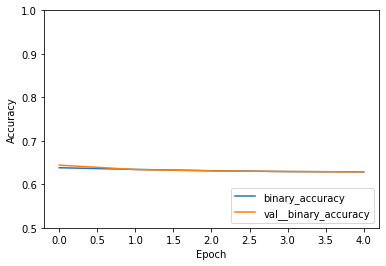

In [ ]:
plt.plot(history.history['binary_accuracy'], label='binary_accuracy')
plt.plot(history.history['val_binary_accuracy'], label = 'val__binary_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [ ]:
test_loss

0.5090715289115906

In [ ]:
test_acc

0.6056135892868042

In [ ]:
for k in range(20):
  model.fit(x_train,y_train)
  accuracy=acc(x_val,y_val,model)
  a.append(accuracy)

In [ ]:
def acc_new(x_test,y_test,clf):
  a=0
  fp=0
  fn=0
  tp=0
  tn=0
  for i in range(len(x_test)):
    res=clf.predict(x_test[i].reshape(1,-1))
    #print(res)
    if res==y_test[i]:
      a+=1
      if y_test[i]==1:
        tp+=1
      else:
        tn+=1
    else:
      if y_test[i]==1:
        fp+=1
      else:
        fn+=1
  return a/len(x_test),fp,fn,tp,tn



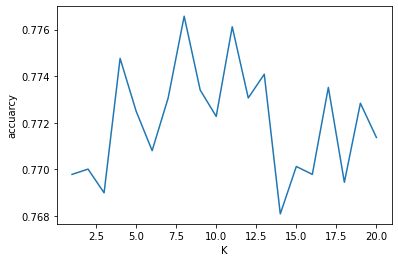

In [ ]:
import matplotlib.pyplot as plt
plt.plot([*range(1,21)],a)
plt.ylabel('accuarcy')
plt.xlabel('K')
plt.show()

In [ ]:
k=a.index(max(a))+1
print(k)

8


In [ ]:
k

9

In [ ]:
a

[0.7715965626413388,
 0.7685436454093171,
 0.7685436454093171,
 0.7674129353233831,
 0.7726142017186793,
 0.770805065581185,
 0.7720488466757124,
 0.7723880597014925,
 0.7736318407960199,
 0.771370420624152,
 0.7697874265038445,
 0.7710312075983717,
 0.7676390773405699,
 0.769674355495251,
 0.7663952962460425,
 0.7652645861601085,
 0.7671867933061963,
 0.7652645861601085,
 0.7652645861601085,
 0.7649253731343284,
 0.7640208050655812,
 0.7640208050655812,
 0.7623247399366803,
 0.765377657168702,
 0.7622116689280869]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=k) # Ben de encoded columnları silmek zorunda kaldım.
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
accuracy,f_p,f_n,t_p,t_n=acc_new(x_test,y_test,knn)

In [ ]:
print("accuracy",accuracy)
print("false positive",f_p)
print("false negative",f_n)
print("true positive",t_p)
print("true negative",t_n)

accuracy 0.77213902232269
false positive 2565
false negative 1467
true positive 6332
true negative 7331
